In [2]:
import pandas as pd

In [4]:
amazon_df=pd.read_csv('amazon_prime_titles.csv')

In [6]:
amazon_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...
...,...,...,...,...,...,...,...,...,...,...,...,...
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaN,1940,7+,60 min,Comedy,New York City street principles get an East Si...
9664,s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,NaN,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve..."
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou..."
9666,s9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,NaN,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ..."


In [10]:
# Basic Information
print("Number of rows:", len(amazon_df))
print("\nData types:\n", amazon_df.dtypes)
print("\nSummary statistics:\n", amazon_df.describe())

# Value Counts for Categorical Columns
categorical_cols = ['type', 'country', 'rating']
for col in categorical_cols:
    print(f"\nValue counts for {col}:\n", amazon_df[col].value_counts())

Number of rows: 9668

Data types:
 show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Summary statistics:
        release_year
count   9668.000000
mean    2008.341849
std       18.922482
min     1920.000000
25%     2007.000000
50%     2016.000000
75%     2019.000000
max     2021.000000

Value counts for type:
 type
Movie      7814
TV Show    1854
Name: count, dtype: int64

Value counts for country:
 country
United States                            253
India                                    229
United Kingdom                            28
Canada                                    16
United Kingdom, United States             12
                                        ... 
United States, Germany, Brazil, Italy      1
South Africa                      

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

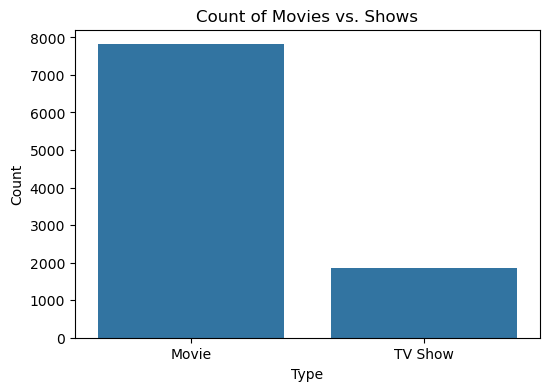

In [10]:
# Visualizations

# 1. Count of Movies vs. Shows
plt.figure(figsize=(6, 4))
sns.countplot(data=amazon_df, x='type')
plt.title('Count of Movies vs. Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

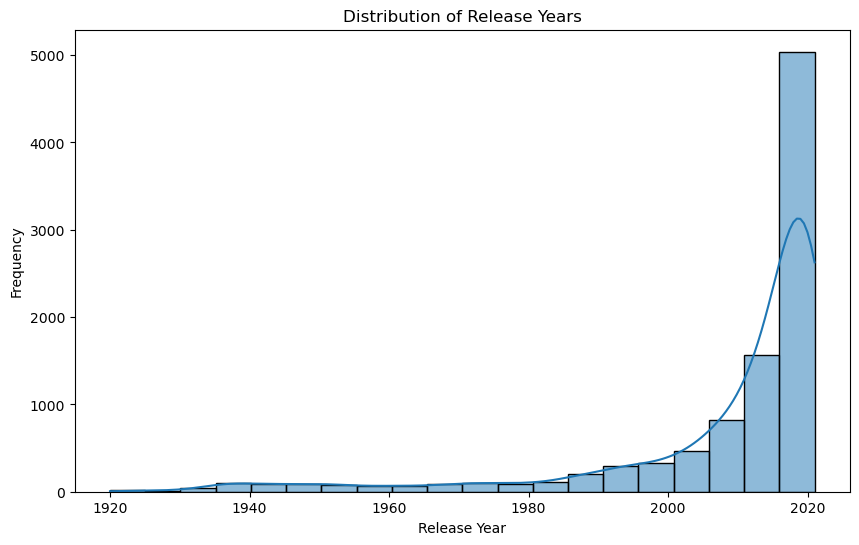

In [23]:
# 2. Distribution of Release Years
plt.figure(figsize=(10, 6))
sns.histplot(amazon_df['release_year'], bins=20, kde=True)
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

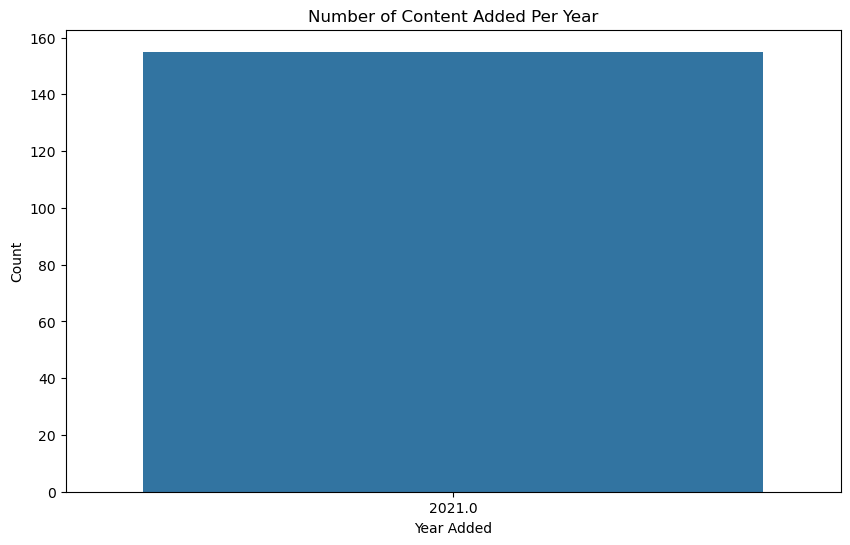

In [12]:
# 3. Number of Content Added Over Time
# Convert 'date_added' to datetime objects
amazon_df['date_added'] = pd.to_datetime(amazon_df['date_added'])
amazon_df['added_year'] = amazon_df['date_added'].dt.year

plt.figure(figsize=(10, 6))
sns.countplot(data=amazon_df, x='added_year')
plt.title('Number of Content Added Per Year')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.show()

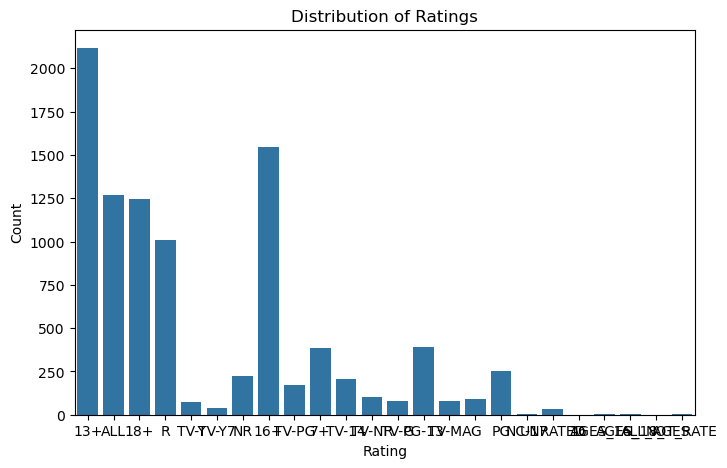

In [13]:
# 4. Distribution of Ratings
plt.figure(figsize=(8, 5))
sns.countplot(data=amazon_df, x='rating')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

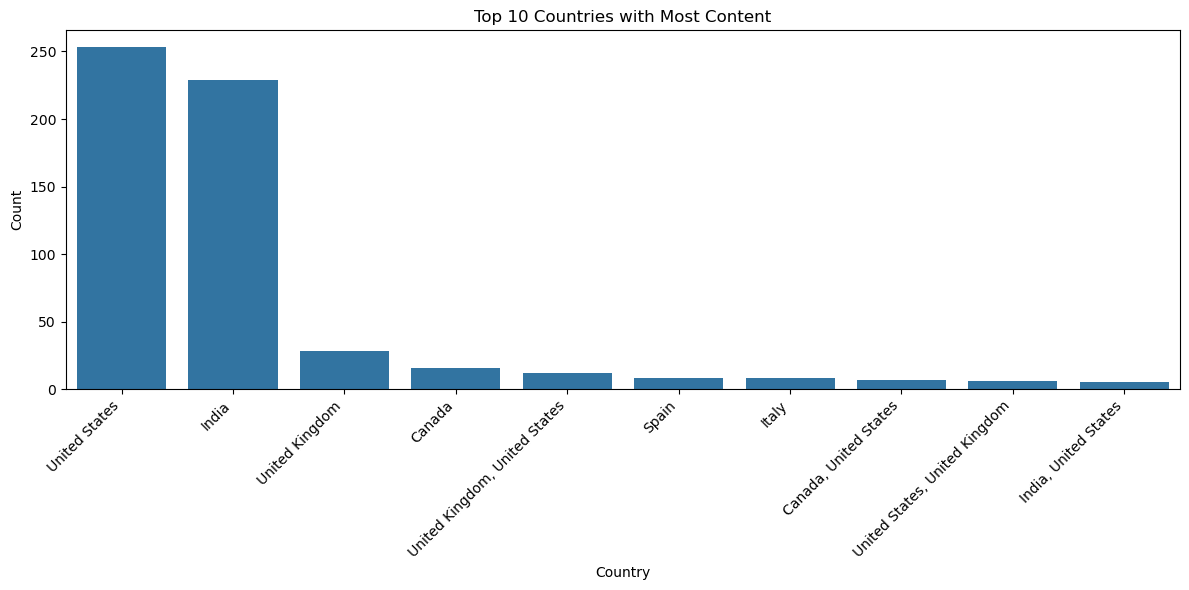

In [32]:
# 5. Content Distribution by Country (Top N)
top_n = 10  # Adjust as needed
country_counts = amazon_df['country'].value_counts().nlargest(top_n)
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title(f'Top {top_n} Countries with Most Content')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()